# Curso de Introdução ao Python: Módulo 6

---

<center>
<img src="https://github.com/marcelorandolfo/data-science/raw/master/images/imagem_curso.png" width="3000"/>
</center>


**Marcelo Randolfo** \\
**Fundação João Pinheiro**

Neste módulo de curso será apresentado a criação de gráficos no Python. Esse é um tópico bastante extenso, pois é possível customizar todos os aspectos de um gráficos. Desse forma, o objetivo com esse módulo é apresentar uma introdução à visualização de dados utilizando o Python. Para maiores informações sobre gráficos **recomenda-se** a consulta às documentações dos pacotes.

Dois pacotes serão utilizados como base, **matplotlib** e **seaborn**, mas no final há links para outros pacotes de visualização de dados. 

Mas antes de criar os gráficos é necessário importar os dados que servirão como base para os gráficos. Serão importados:

* Dados do enade.
* Dados do Índice Mineiro de Responsabilidade Social para a qualidade da educação.
* Dados do PIB de Minas Gerais com ajuste sazonal.

Os arquivos com os dados podem ser baixados na pasta *datasets*.

Para importar os dados temos que primeiro importar os pacotes base: pandas e numpy.

In [ ]:
# importando pacotes
import pandas as pd
import numpy as np

---

## Importando os dados

In [ ]:
# importando dados do enade
enade = pd.read_csv('/content/enade.csv')

# importando dados do imrs
imrs = pd.read_excel('/content/imrs_educacao.xlsx')

# importando dados do PIB MG
pib_mg = pd.read_excel('/content/dados_processados.xlsx')

In [ ]:
# observando os dados do enade
enade.head()

,co_grupo,cd_catadd,co_uf_curso,co_regiao_curso,nu_idade,genero,ano_fim_2g,tp_inscricao,co_rs_s4n,co_rs_s5n,co_rs_s6n,co_rs_s7n,co_rs_s8n,co_rs_s9n,co_rs_s101,co_rs_s102,co_rs_s103,co_rs_s11n,co_rs_s20n
0,Medicina Veterinária,IES Pública,Mato Grosso,Centro-Oeste,22,0,2008,Concluinte,Ensino Médio,Ensino Superior,Pais/Parentes,"De 1,5 a 3 salários mínimos",Tenho renda,Não trabalho,Não Prouni integral,Não Prouni parcial,Curso gratuito,Auxílio,Sim
1,Medicina Veterinária,IES Pública,Mato Grosso,Centro-Oeste,21,0,2008,Concluinte,Ensino Fundamental 1ª a 4ª,Pós-graduação,Sozinho,De 6 a 10 salários mínimos,Tenho renda/ajuda da família,Não trabalho,Não Prouni integral,Não Prouni parcial,Curso gratuito,Sem auxílio,Sim
2,Medicina Veterinária,IES Pública,Mato Grosso,Centro-Oeste,28,1,2002,Concluinte,Ensino Médio,Pós-graduação,Sozinho,"De 1,5 a 3 salários mínimos",Não tenho renda/ajuda da familía,Não trabalho,Não Prouni integral,Não Prouni parcial,Curso gratuito,Sem auxílio,Sim
3,Medicina Veterinária,IES Pública,Mato Grosso,Centro-Oeste,25,0,2005,Concluinte,Ensino Fundamental 1ª a 4ª,Ensino Superior,Sozinho,"Até 1,5 salário mínimo",Não tenho renda/ajuda da familía,Não trabalho,Não Prouni integral,Não Prouni parcial,Curso gratuito,Sem auxílio,Sim
4,Medicina Veterinária,IES Pública,Mato Grosso,Centro-Oeste,26,1,2004,Concluinte,Ensino Médio,Ensino Médio,Pais/Parentes,"De 3 a 4,5 salários mínimos",Tenho renda/ajuda da família,Não trabalho,Não Prouni integral,Não Prouni parcial,Curso gratuito,Sem auxílio,Sim


In [ ]:
# observando os dados do imrs
imrs.head()

,Município,Índice de Qualidade da Educação para a 4ª série /5º ano do EF (matemática),Índice de Qualidade da Educação para a 8ª série/9º ano do EF (matemática),Índice de Qualidade da Educação para a 3ª série do EM (matemática),Nova média,Índice de Qualidade da Educação para a 4ª série /5º ano do EF (Língua Portuguesa),Índice de Qualidade da Educação para a 8ª série/9º ano do EF (Língua Portuguesa),Índice de Qualidade da Educação para a 3ª série do EM (Língua Portuguesa),Índice de Qualidade da Educação para a 4ª série /5º ano do EF,Índice de Qualidade da Educação para a 8ª série/9º ano do EF,Índice de Qualidade da Educação para a 3ª série do EM,Índice de Qualidade Geral da Educação,Taxa de alunos da 8ª série/9º ano do fundamental acima do nível BÁSICO - Matemática,Taxa de alunos da 8ª série/9º ano do fundamental acima do nível BÁSICO - Português,Taxa de alunos da 3ª série do médio acima do nível BÁSICO - Matemática,Taxa de alunos da 3ª Série do médio acima do nível BÁSICO - Português,Número de alunos da 8ª série/9º ano do fundamental que fizeram a prova de Matemática do PROEB,Número de alunos da 8ª série/9º ano do fundamental que fizeram a prova de Português do PROEB,Número de alunos da 3ª série do médio que fizeram a prova de Matemática do PROEB,Número de alunos da 3ª série do médio que fizeram a prova de Português do PROEB,Percentual de alunos da 8ª série/9º ano do fundamental que fizeram a prova de Matemática do PROEB,Percentual de alunos da 8ª série/9º ano do fundamental que fizeram a prova de Português do PROEB,Percentual de alunos da 3ª série do médio que fizeram a prova de Matemática do PROEB,Percentual de alunos da 3ª série do médio que fizeram a prova de Português do PROEB,Taxa de alunos em escolas com laboratório de informática - fundamental,Taxa de alunos em escolas com Internet - fundamental,Taxa de alunos em escolas com laboratório de informática - médio,Taxa de alunos em escolas com Internet - médio,Percentual de Funções Docentes com curso superior_EI,Percentual de Funções Docentes com curso superior_EF,Percentual de Funções Docentes com curso superior_EFAI,Percentual de Funções Docentes com curso superior_EFAF,Percentual de Funções Docentes com curso superior_EM,Percentual de docentes por grupo do indicador de adequação da formação do docente (Grupo 1)_EI,Percentual de docentes por grupo do indicador de adequação da formação do docente (Grupo 2)_EI,Percentual de docentes por grupo do indicador de adequação da formação do docente (Grupo 3)_EI,Percentual de docentes por grupo do indicador de adequação da formação do docente (Grupo 4)_EI,Percentual de docentes por grupo do indicador de adequação da formação do docente (Grupo 5)_EI,Percentual de docentes por grupo do indicador de adequação da formação do docente (Grupo 1)_EF,Percentual de docentes por grupo do indicador de adequação da formação do docente (Grupo 2)_EF,Percentual de docentes por grupo do indicador de adequação da formação do docente (Grupo 3)_EF,Percentual de docentes por grupo do indicador de adequação da formação do docente (Grupo 4)_EF,Percentual de docentes por grupo do indicador de adequação da formação do docente (Grupo 5)_EF,Percentual de docentes por grupo do indicador de adequação da formação do docente (Grupo 1)_EFAI,Percentual de docentes por grupo do indicador de adequação da formação do docente (Grupo 2)_EFAI,Percentual de docentes por grupo do indicador de adequação da formação do docente (Grupo 3)_EFAI,Percentual de docentes por grupo do indicador de adequação da formação do docente (Grupo 4)_EFAI,Percentual de docentes por grupo do indicador de adequação da formação do docente (Grupo 5)_EFAI,Percentual de docentes por grupo do indicador de adequação da formação do docente (Grupo 1)_EFAF,Percentual de docentes por grupo do indicador de adequação da formação do docente (Grupo 2)_EFAF,Percentual de docentes por grupo do indicador de adequação da formação do docente (Grupo 3)_EFAF,Percentual de docentes por grupo do indicador de adequação 

In [ ]:
# observando os dados do PIB
pib_mg.head()

,Período,Agropecuária,Indústria_extr_mineral,Industria_transformação,Indústria_energia_saneamento,Indústria_construção_civil,Indústria_total,Serviços_comércio,Serviços_transporte,Serviços_outros,Serviços_adm_pública,Serviços_total,VA,Impostos,PIB
0,2002.I,98.936010,101.333703,98.574621,93.939221,99.347774,98.759882,98.519974,101.116314,98.849826,99.526961,98.726159,98.096435,96.910704,98.481262
1,2002.II,98.968620,95.291098,99.281977,97.066780,100.444385,98.523262,100.027436,98.470957,99.704754,99.775312,99.632811,99.699985,100.155894,99.387981
2,2002.III,103.071490,99.617998,100.058894,105.513134,100.018187,100.506939,101.472669,100.273171,100.650404,100.074669,100.747353,100.996102,100.459154,100.602548
3,2002.IV,98.903829,103.567720,102.011047,103.609027,100.104993,102.196560,99.850329,99.354609,100.972724,100.502276,100.875763,101.101393,102.337064,101.442543
4,2003.I,104.351086,107.697940,103.024564,106.969342,99.625330,103.512649,100.442695,97.332847,101.183183,100.208813,100.253926,101.329935,102.855879,101.456117


Diferentemente dos outros dados, os dados do PIB MG são temporais. Nesse caso, é interessante definir o índice do dataframe como série temporal. Uma das formas de fazer isso é criar uma série histórica, utilizando a função `data_range` do pandas.

São passados como parâmetros: data inicial dos dados, número de períodos e frequência. Depois disso basta definir que o índice do dataframe deve ser igual à série histórica temporal. Depois é feita um alteração na escrita do índice, que será *QX-20XX*. 

O próximo passo é excluir a coluna com as informações dos trimestres. Essa coluna não foi utilizada como base para a série temporal, como já vimos anteriormente, pois o objetivo é mostrar outras formas de realizar essa operação. 

In [ ]:
# indice temporal
pib_mg.index = pd.date_range(start = '01/01/2002', periods = pib_mg.shape[0], freq = 'Q')
pib_mg.index = pib_mg.index.to_period('Q').strftime('Q%q-%Y')

# removendo coluna período
pib_mg.drop('Período', axis = 1, inplace = True)

In [ ]:
# observando novamente os dados do PIB
pib_mg.head()

,Agropecuária,Indústria_extr_mineral,Industria_transformação,Indústria_energia_saneamento,Indústria_construção_civil,Indústria_total,Serviços_comércio,Serviços_transporte,Serviços_outros,Serviços_adm_pública,Serviços_total,VA,Impostos,PIB
Q1-2002,98.936010,101.333703,98.574621,93.939221,99.347774,98.759882,98.519974,101.116314,98.849826,99.526961,98.726159,98.096435,96.910704,98.481262
Q2-2002,98.968620,95.291098,99.281977,97.066780,100.444385,98.523262,100.027436,98.470957,99.704754,99.775312,99.632811,99.699985,100.155894,99.387981
Q3-2002,103.071490,99.617998,100.058894,105.513134,100.018187,100.506939,101.472669,100.273171,100.650404,100.074669,100.747353,100.996102,100.459154,100.602548
Q4-2002,98.903829,103.567720,102.011047,103.609027,100.104993,102.196560,99.850329,99.354609,100.972724,100.502276,100.875763,101.101393,102.337064,101.442543
Q1-2003,104.351086,107.697940,103.024564,106.969342,99.625330,103.512649,100.442695,97.332847,101.183183,100.208813,100.253926,101.329935,102.855879,101.456117


Com os dados importados, já podemos começar a criar as visualizações.

---

## Importando pacotes necessários: *matplotlib* e *seaborn*

As visualizações serão feitas por dois pacotes: **matplotlib** e **seaborn**. Assim como outros pacotes do python, as documentações desses pacotes é bastante completa e muito fácil de entender.  

* [Documentação do Matplotlib](https://matplotlib.org/)
* [Documentação do Seaborn](https://seaborn.pydata.org/)

O matplotlib é um pacote robusto para gráficos, mas é antigo. Por isso o seaborn foi criado para ser um adendo ao matplotlib. Ambos podem ser usados de forma independente, mas melhores resultados são obtidos quando utilizados em conjunto.

Para importar os pacotes basta executar o seguinte código.



In [ ]:
# importando pacotes
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Mas antes de começar a criar os gráficos é necessário entender o papel da orientação ao objeto nas figuras.

---

## Gráficos com orientação ao objeto

Na visualização de dados de uma linguagem orientada ao objeto tem-se 3 objetos por trás de cada *plot*. 

<center><img src="https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/fig_map.bc8c7cabd823.png" height="300px"></center>


O objeto mais "exterior" de cada plot é o objeto do tipo `Figure`. Dentro de uma `Figure` existe um objeto do tipo `Axes`. Dentro de cada `Axes` ficam os objetos menores, como legendas, títulos, textos e *tick marks*.

O objeto do tipo `Axes` contém as informações de um gráfico individual, enquanto um objeto do tipo `Figure` pode conter informações de um ou mais gráficos.

Ao criarmos um gráfico simples de linha, contendo a série histórica do PIB de MG, temos esses três objetos combinados.

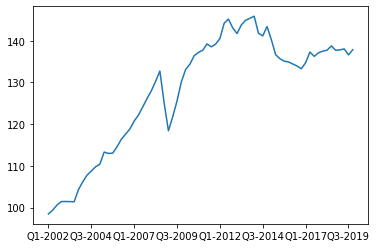

In [ ]:
# plot de um gráfico simples
pib_mg['PIB'].plot();

É possível customizar as informações desse gráfico, adicionando título e legendas para os eixos x e y.

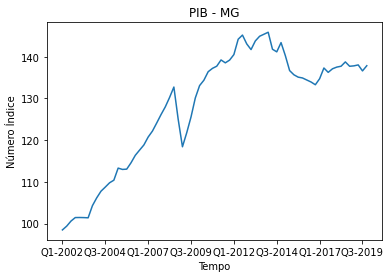

In [ ]:
# plot de um gráfico simples com informações
pib_mg['PIB'].plot()
plt.title('PIB - MG')
plt.ylabel('Número Índice')
plt.xlabel('Tempo');

Entretanto, a criação de gráficos dessa forma mais direta nos impede de ter um maior poder de alterar as características do gráfico. Isso ocorre pois existem características que estão ligadas ao objeto `Figure` do gráfico e outras ligadas ao objeto `Axes` do gráfico, e a abordagem direta não permite que façamos alterações em um tipo de objeto ou outro.

Quando precisamos assumir de fato o controle do que estamos fazendo, é preferível adotar uma abordagem orientada a objeto, conhecida como abordagem ***stateless***. Trabalhando com uma abordagem orientada a objeto, mais customizações e tipos de gráficos são possíveis. Para fazer isso, precisamos criar dois objetos: `Figure` e `Axes`, o que pode ser feito usando `plt.subplots()`.

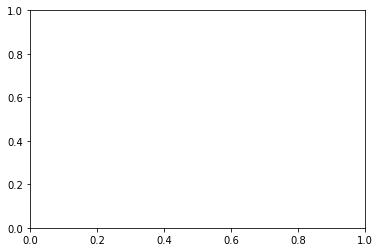

In [ ]:
# criando um objeto do tipo figure (fig) e outro do tipo axes (ax)
fig, ax = plt.subplots();

O que fizemos acima foi criar uma Figura que irá conter todos os *plots* (`Axes`). Neste caso, como não especificamos nada, foi criado apenas 1 `Figure` e 1 `Axes` (*plot*). A partir disso, a manipulação e customização passa a ser diretamente na variável `ax` ou na variável `fig`.

---

## Gráfico de linha

O primeiro tipo de gráfico a ser criado é o gráfico linha. Mas diferentemente dos gráficos anteriores, ele será criado sob uma perspectiva orientada ao objeto.

Nesse caso cria-se os dois objetos, `fig` e `ax`, onde o objeto `ax` irá receber as informações do *plot* do PIB MG. Depois utiliza-se a função `tight_layout` para exibir o objeto `fig` que contém o objeto `ax`.

Esses outras função além do `tight_layout` para plotar gráficos, como a função `show`, mas a `tight_layout` mantém uma boa proporção dos elementos da figura. Principalmente quando existem mais de um objeto do tipo `Axes`, como veremos a seguir.

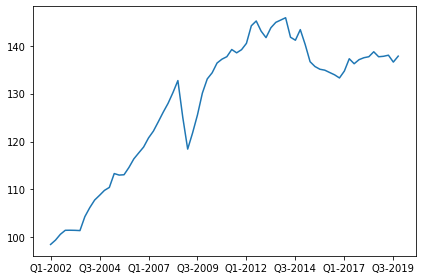

In [ ]:
# plotando um gráfico de linhas
fig, ax = plt.subplots()

pib_mg['PIB'].plot(ax = ax)

fig.tight_layout()

Podemos adicionar os elementos do objeto `ax`, como título e legenda dos eixos x e y. Como essas são informações do objeto `ax` e não do objeto `fig`, temos que chamar o objeto correspondente e depois a função. Para o título, a função é `set_title`, para a legenda do eixo y é `set_ylabel` e para o eixo x é `set_xlabel`.

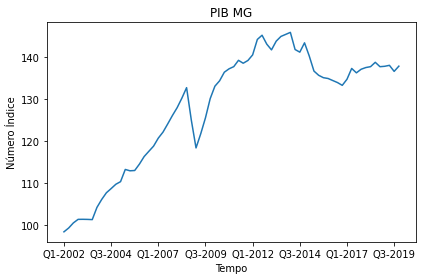

In [ ]:
# plotando um gráfico de linhas
fig, ax = plt.subplots()

pib_mg['PIB'].plot(ax = ax)

# criando informações do gráfico
ax.set_title('PIB MG')
ax.set_ylabel('Número Índice')
ax.set_xlabel('Tempo')

fig.tight_layout()

Todos esses gráficos estão utilizando as funções do pacote `matplotlib`. Mas esse pacote não possui recursos visuais muito adequados. Para uma visualização mais expressiva é melhor utilizar o pacote  `seaborn`. 

Uma forma muito simples de utilizar os recursos do seaborn nos gráficos do matplotlib é definir o estilo do notebook segundo o pacote seaborn, conforme mostra o código abaixo.

In [ ]:
# definindo o estilo do notebook
sns.set()

Agora se executarmos o mesmo código anterior, teremos o gráfico no estilo do pacote **seaborn**.

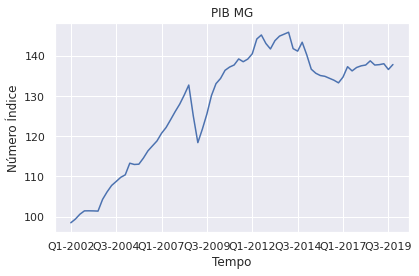

In [ ]:
# plotando um gráfico de linhas
fig, ax = plt.subplots()

pib_mg['PIB'].plot(ax = ax)

# criando informações do gráfico
ax.set_title('PIB MG')
ax.set_ylabel('Número Índice')
ax.set_xlabel('Tempo')

fig.tight_layout()

Mesmo utilizando o estilo de outro pacote, as customizações continuam sendo feitas da mesma forma. Por exemplo, as linhas do fundo do objeto `Axes`, chamadas de *grid*, podem ser retiradas. Além disso, as referências de data no eixo x, chamadas de *ticks*, estão muito perto uma das outras, nesse caso é melhor colocá-las um pouco inclinadas.

Amabas as características são relacionadas ao objeto `ax`, pois estão inseridas dentro desse objeto. O código abaixo executa essas alterações.

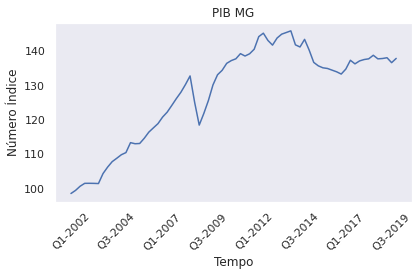

In [ ]:
# plotando um gráfico de linhas
fig, ax = plt.subplots()

pib_mg['PIB'].plot(ax = ax)

# criando informações do gráfico
ax.set_title('PIB MG')
ax.set_ylabel('Número Índice')
ax.set_xlabel('Tempo')

# eliminando as grades do gráfico
ax.grid(False)

# rotacionando os valores do eixo x
ax.tick_params(axis='x', labelrotation=45)

fig.tight_layout()

O estilo do pacote `seaborn` que foi utilizado é o padrão do pacote. Mas existem outros estilos já definidos e que podem ser utilizados. Normalmente esses estilos alteram as cores padrão, por exemplo a cor padrão da linha é azul, a cor de fundo do gráfico ou as bordas. Neste [link](http://seaborn.pydata.org/tutorial/aesthetics.html) estão alguns outros estilos do pacote seaborn para serem utilizados nos gráficos.

In [ ]:
# utilizando o estilo white
sns.set_style("white")

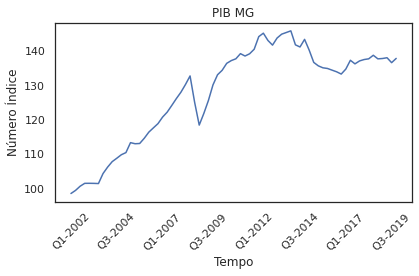

In [ ]:
# plotando um gráfico de linhas
fig, ax = plt.subplots()

pib_mg['PIB'].plot(ax = ax)

# criando informações do gráfico
ax.set_title('PIB MG')
ax.set_ylabel('Número Índice')
ax.set_xlabel('Tempo')

# eliminando as grades do gráfico
ax.grid(False)

# rotacionando os valores do eixo x
ax.tick_params(axis='x', labelrotation=45)

fig.tight_layout()

O objeto `Axes` permite mais de uma informação no mesmo gráfico. Por exemplo, podemos plotar mais de uma linha no gráfico. Porém, as duas séries devem compartilhar o mesmo índice.

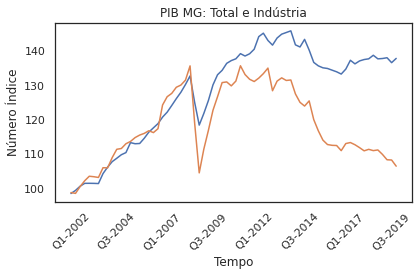

In [ ]:
# plotando um gráfico de linhas
fig, ax = plt.subplots()

# plot da série 1
pib_mg['PIB'].plot(ax = ax)

# plot da série 2
pib_mg['Indústria_total'].plot(ax = ax)

# criando informações do gráfico
ax.set_title('PIB MG: Total e Indústria')
ax.set_ylabel('Número Índice')
ax.set_xlabel('Tempo')

# rotacionando os valores do eixo x
ax.tick_params(axis='x', labelrotation=45)

fig.tight_layout()

Como temos mais de uma série no mesmo gráfico, é interessante adicionarmos uma legenda. Pode-se também alterar a cor da linha que está no gráfico.

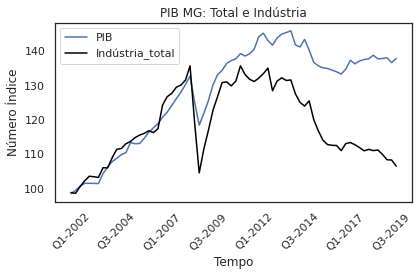

In [ ]:
# plotando um gráfico de linhas
fig, ax = plt.subplots()

# plot da série 1
pib_mg['PIB'].plot(ax = ax)

# plot da série 2
pib_mg['Indústria_total'].plot(ax = ax, color = 'black')

# criando informações do gráfico
ax.set_title('PIB MG: Total e Indústria')
ax.set_ylabel('Número Índice')
ax.set_xlabel('Tempo')

# adicionando legenda
ax.legend()

# rotacionando os valores do eixo x
ax.tick_params(axis='x', labelrotation=45)

fig.tight_layout()

Pode-se ainda alterar o texto que está na legenda, obedecendo a sequência das séries que foram plotadas. No caso, na função `legend` deve-se passar como parâmetro uma lista com os nomes que aparecerão na legenda, onde o primeiro nome irá se referir a serie do PIB total e a segundo o PIB da índústria.

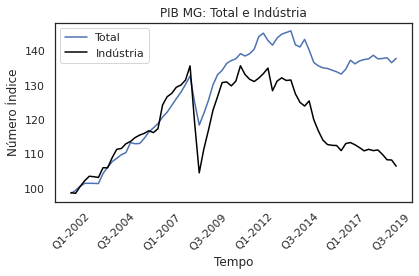

In [ ]:
# plotando um gráfico de linhas
fig, ax = plt.subplots()

# plot da série 1
pib_mg['PIB'].plot(ax = ax)

# plot da série 2
pib_mg['Indústria_total'].plot(ax = ax, color = 'black')

# criando informações do gráfico
ax.set_title('PIB MG: Total e Indústria')
ax.set_ylabel('Número Índice')
ax.set_xlabel('Tempo')

# adicionando legenda
ax.legend(['Total','Indústria'])

# rotacionando os valores do eixo x
ax.tick_params(axis='x', labelrotation=45)

fig.tight_layout()

Mas digamos que a melhor opção é plotar as séries do PIB MG para cada setor: agropecuária, indústria e serviços, separadamente. No caso, com cada série em um gráfico próprio.

Para isso criamos um objeto do tipo `Figure` e três objetos do tipo `Axes`. Os três objetos ax irão compor o objeto fig.

Para isso, passa-se na função `subplots` o número de linhas e colunas que o objeto `Figure` irá conter. Como são três gráficos, o objeto fig terá uma coluna e três linhas. Como são vários gráficos, passa-se no parâmetro `figsize` o tamanho do objeto fig, onde o primeiro valor corresponde à largura e o segundo à altura do objeto.

Perceba que cadá série tem seu próprio objeto ax (`ax[0]` corresponde a primeira série, `ax[1]` a segunda e `ax[2]` a terceira). Para inserir as informações referentes a cada gráfico, devemos sempre chamar o objeto ax correto. 

Além disso, cada objeto possui sua própria customização. Por exemplo, é possível plotar os gráficos onde a legenda do primeiro e terceiro gráfico estejam inclinadas, mas do segundo gráfico esteja normal.

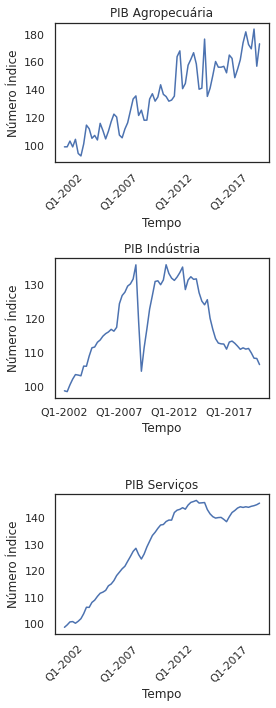

In [ ]:
# plotando vários gráficos de linha
fig, ax = plt.subplots(ncols = 1, nrows = 3, figsize = (4,10))

# primeiro gráfico
pib_mg['Agropecuária'].plot(ax = ax[0])
ax[0].set_title('PIB Agropecuária')
ax[0].set_ylabel('Número Índice')
ax[0].set_xlabel('Tempo')
ax[0].tick_params(axis='x', labelrotation=45)

# segundo gráfico
pib_mg['Indústria_total'].plot(ax = ax[1])
ax[1].set_title('PIB Indústria')
ax[1].set_ylabel('Número Índice')
ax[1].set_xlabel('Tempo')

# terceiro gráfico
pib_mg['Serviços_total'].plot(ax = ax[2])
ax[2].set_title('PIB Serviços')
ax[2].set_ylabel('Número Índice')
ax[2].set_xlabel('Tempo')
ax[2].tick_params(axis='x', labelrotation=45)

fig.tight_layout()

Mas é possível manter o mesmo padrão para cada gráfico, além de aumentar a figura para que as informações sejam melhor visualizadas.

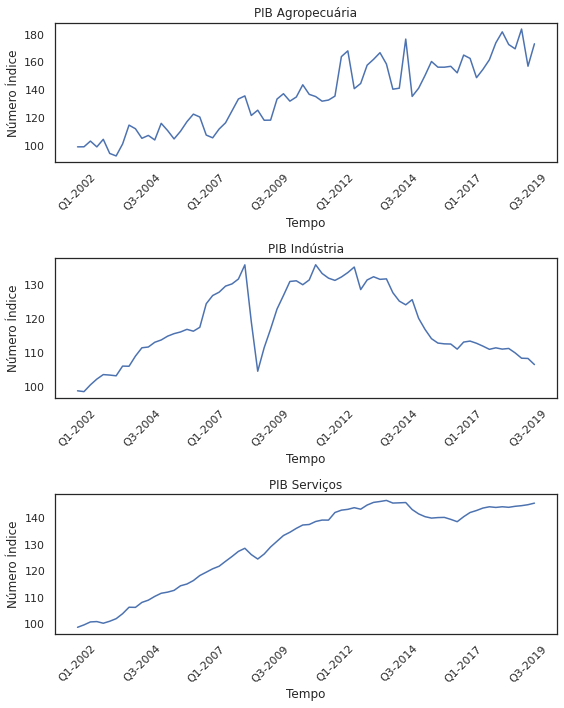

In [ ]:
# plotando vários gráficos de linha
fig, ax = plt.subplots(ncols = 1, nrows = 3, figsize = (8,10))

# primeiro gráfico
pib_mg['Agropecuária'].plot(ax = ax[0])
ax[0].set_title('PIB Agropecuária')
ax[0].set_ylabel('Número Índice')
ax[0].set_xlabel('Tempo')
ax[0].tick_params(axis='x', labelrotation=45)

# segundo gráfico
pib_mg['Indústria_total'].plot(ax = ax[1])
ax[1].set_title('PIB Indústria')
ax[1].set_ylabel('Número Índice')
ax[1].set_xlabel('Tempo')
ax[1].tick_params(axis='x', labelrotation=45)

# terceiro gráfico
pib_mg['Serviços_total'].plot(ax = ax[2])
ax[2].set_title('PIB Serviços')
ax[2].set_ylabel('Número Índice')
ax[2].set_xlabel('Tempo')
ax[2].tick_params(axis='x', labelrotation=45)

fig.tight_layout()

Outra modificação possível de ser feitas nos gráficos é compartilhar os valores dos eixos. Por exemplo, os gráficos acima possuem os mesmos valores no eixo x, que é o tempo. Como todas as séries derivam do mesmo dataframe todas possuem a mesma data (mensurada no índice), mas a opção de compartilhar o eixo vale para dados com diferentes índices.

Se quisermos fazer com que as séries compartilhem o eixo x, basta passar na função `subplots` o parâmetro `sharex` igual a `True`.

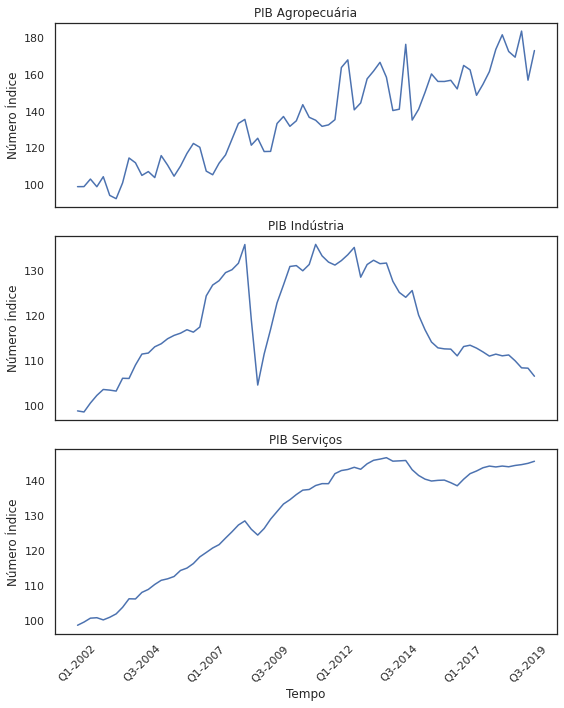

In [ ]:
# plotando vários gráficos de linha
fig, ax = plt.subplots(ncols = 1, nrows = 3, figsize = (8,10), sharex = True)

# primeiro gráfico
pib_mg['Agropecuária'].plot(ax = ax[0])
ax[0].set_title('PIB Agropecuária')
ax[0].set_ylabel('Número Índice')
ax[0].set_xlabel('Tempo')
ax[0].tick_params(axis='x', labelrotation=45)

# segundo gráfico
pib_mg['Indústria_total'].plot(ax = ax[1])
ax[1].set_title('PIB Indústria')
ax[1].set_ylabel('Número Índice')
ax[1].set_xlabel('Tempo')
ax[1].tick_params(axis='x', labelrotation=45)

# terceiro gráfico
pib_mg['Serviços_total'].plot(ax = ax[2])
ax[2].set_title('PIB Serviços')
ax[2].set_ylabel('Número Índice')
ax[2].set_xlabel('Tempo')
ax[2].tick_params(axis='x', labelrotation=45)

fig.tight_layout()

No caso, colocamos os gráficos empilhados de forma vertical, já que definimos que o objeto `Figure` teria três linhas e uma coluna de objetos `Axes`. Mas poderiamos ter passado que a série teria uma linha e três colunas. Sendo assim não faria mais sentido compartilhar o eixo x e sim o eixo y. Nos nossos dados, compartilhar o eixo y faz sentido pois todas as séries possuem a mesma unidade de medida, números índices. Logo, compartilhar o mesmo eixo para as três séries faria com que todas estivessem com a mesma escala.

Caso as séries tivessem unidades de medidas diferentes, não faria sentido compartilhar o eixo, mas mesmo assim seria possível compartilhar.

Como os gráficos estarão agora dispostos de forma horizontal, é necessário mudar o tamanho do objeto fig.

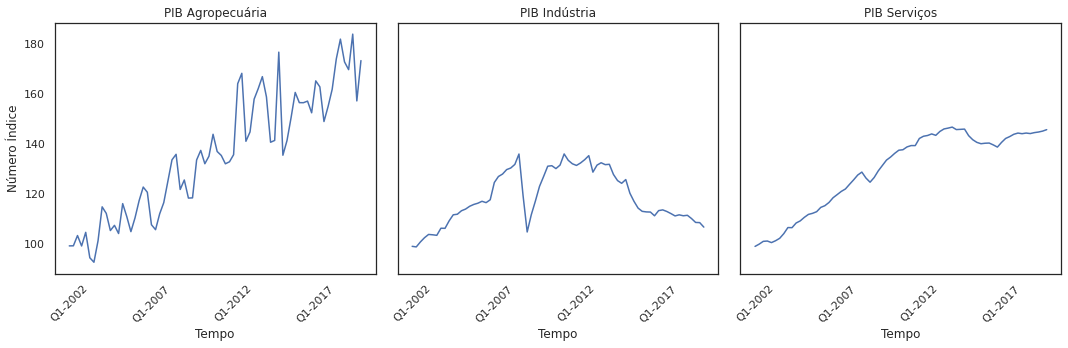

In [ ]:
# plotando vários gráficos de linha
fig, ax = plt.subplots(ncols = 3, nrows = 1, figsize = (15,5), sharey = True)

# primeiro gráfico
pib_mg['Agropecuária'].plot(ax = ax[0])
ax[0].set_title('PIB Agropecuária')
ax[0].set_ylabel('Número Índice')
ax[0].set_xlabel('Tempo')
ax[0].tick_params(axis='x', labelrotation=45)

# segundo gráfico
pib_mg['Indústria_total'].plot(ax = ax[1])
ax[1].set_title('PIB Indústria')
ax[1].set_ylabel('Número Índice')
ax[1].set_xlabel('Tempo')
ax[1].tick_params(axis='x', labelrotation=45)

# terceiro gráfico
pib_mg['Serviços_total'].plot(ax = ax[2])
ax[2].set_title('PIB Serviços')
ax[2].set_ylabel('Número Índice')
ax[2].set_xlabel('Tempo')
ax[2].tick_params(axis='x', labelrotation=45)

fig.tight_layout()

Agora as séries estão dispostas em uma mesma escala. 

Perceba que não foi necessário mudar as informações sobre a posição dos objetos `ax`. Isso acontece pois normalmente temos dois parâmetros para indicar como posição, a posição na linha e a posição na coluna. No primeiro exemplo não foi preciso passar a informação sobre a coluna pois só existia uma. O mesmo ocorre no exemplo anterior. Como só temos uma linha, não é necessário passar as informações relativas a posição de linha, pois somente uma opção é válida.

Isso muda caso seja plotado um objeto fig com quatro objetos ax divididos em duas linhas e duas colunas. Nesse caso é mandatório passar as duas informações de posição.

Então caso seja necessário plotar os gráficos de linha das séries do PIB agregado, PIB agropecuário, PIB da indústria e PIB de servições em um *grid* 2x2, devemos executar o seguinte código. Percebam que a série do PIB agregado mesmo estando na primeira posição, `[0,0]`, o código foi escrito por último. Ou seja, não importa qual código vêm primeiro, o importante é marcar corretamente qual a posição do objeto ax.

Além disso, é possível compartilhar o mesmo eixo y para todas as séries, utilizando o comando `sharey=True`. No caso as séries passam a compartilhar um eixo no qual todas as séries possam ser plotar, isto é, o eixo que contém o maior intervalo de valores.

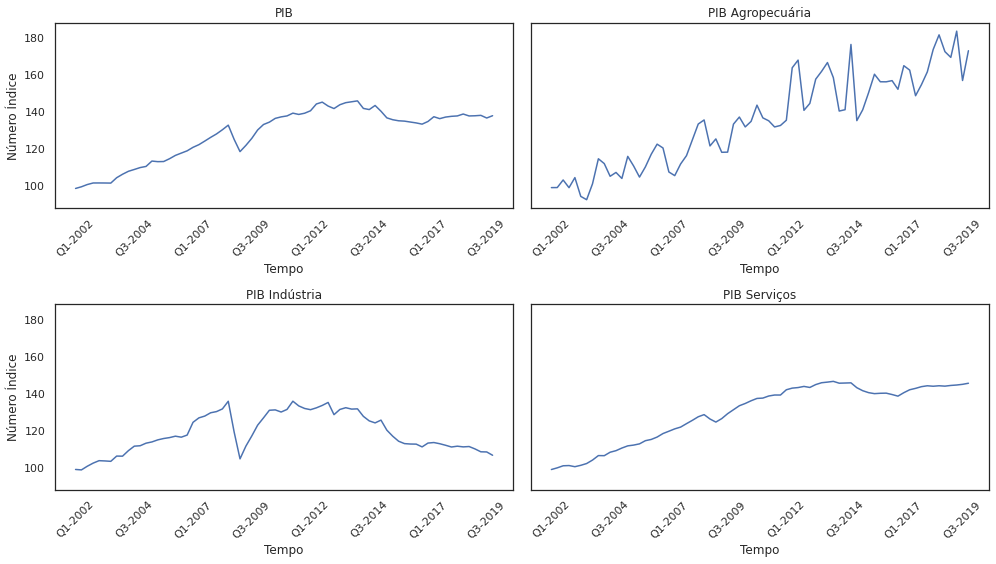

In [ ]:
fig, ax = plt.subplots(ncols = 2, nrows = 2, figsize = (14,8), sharey = True)

# primeiro gráfico
pib_mg['Agropecuária'].plot(ax = ax[0,1])
ax[0,1].set_title('PIB Agropecuária')
ax[0,1].set_ylabel('Número Índice')
ax[0,1].set_xlabel('Tempo')
ax[0,1].tick_params(axis='x', labelrotation=45)

# segundo gráfico
pib_mg['Indústria_total'].plot(ax = ax[1,0])
ax[1,0].set_title('PIB Indústria')
ax[1,0].set_ylabel('Número Índice')
ax[1,0].set_xlabel('Tempo')
ax[1,0].tick_params(axis='x', labelrotation=45)

# terceiro gráfico
pib_mg['Serviços_total'].plot(ax = ax[1,1])
ax[1,1].set_title('PIB Serviços')
ax[1,1].set_ylabel('Número Índice')
ax[1,1].set_xlabel('Tempo')
ax[1,1].tick_params(axis='x', labelrotation=45)

# quarto gráfico
pib_mg['PIB'].plot(ax = ax[0,0])
ax[0,0].set_title('PIB')
ax[0,0].set_ylabel('Número Índice')
ax[0,0].set_xlabel('Tempo')
ax[0,0].tick_params(axis='x', labelrotation=45)

fig.tight_layout()

Tendo feito todos os ajustes, basta agora salvar o objeto **fig** que contém todos os objetos **ax** inseridos. Para fazer isso basta colocar na última linha da célula o `savefig` com o nome do arquivo e a extensão.

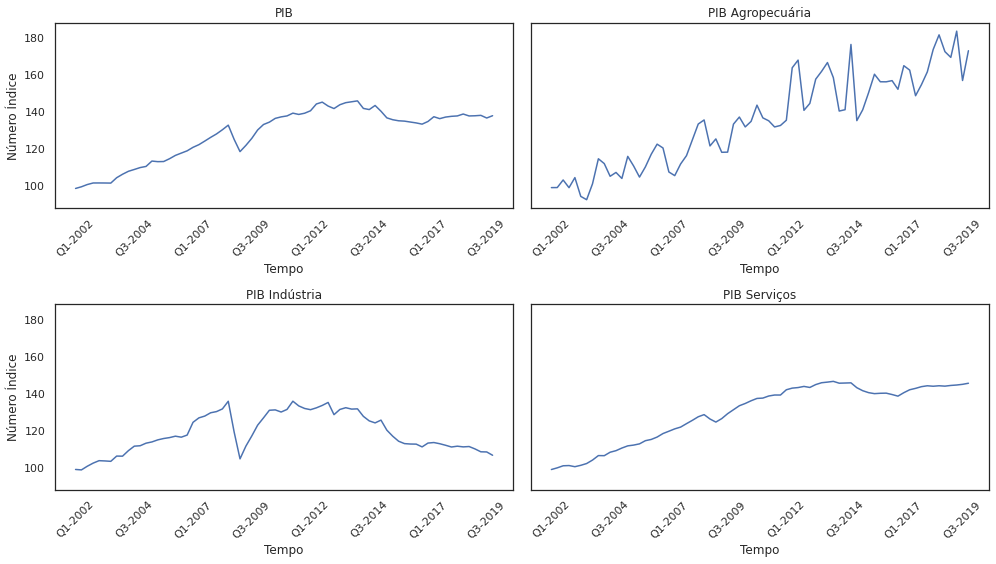

In [ ]:
fig, ax = plt.subplots(ncols = 2, nrows = 2, figsize = (14,8), sharey = True)

# primeiro gráfico
pib_mg['Agropecuária'].plot(ax = ax[0,1])
ax[0,1].set_title('PIB Agropecuária')
ax[0,1].set_ylabel('Número Índice')
ax[0,1].set_xlabel('Tempo')
ax[0,1].tick_params(axis='x', labelrotation=45)

# segundo gráfico
pib_mg['Indústria_total'].plot(ax = ax[1,0])
ax[1,0].set_title('PIB Indústria')
ax[1,0].set_ylabel('Número Índice')
ax[1,0].set_xlabel('Tempo')
ax[1,0].tick_params(axis='x', labelrotation=45)

# terceiro gráfico
pib_mg['Serviços_total'].plot(ax = ax[1,1])
ax[1,1].set_title('PIB Serviços')
ax[1,1].set_ylabel('Número Índice')
ax[1,1].set_xlabel('Tempo')
ax[1,1].tick_params(axis='x', labelrotation=45)

# quarto gráfico
pib_mg['PIB'].plot(ax = ax[0,0])
ax[0,0].set_title('PIB')
ax[0,0].set_ylabel('Número Índice')
ax[0,0].set_xlabel('Tempo')
ax[0,0].tick_params(axis='x', labelrotation=45)

fig.tight_layout()

# salvando a figura
plt.savefig('graf_linha.png')

No caso, a figura foi salva em um arquivo com extensão *.png*. Mas há uma outra opção para salvar gráficos com melhor qualidade, que é a extensão *.svg*. 

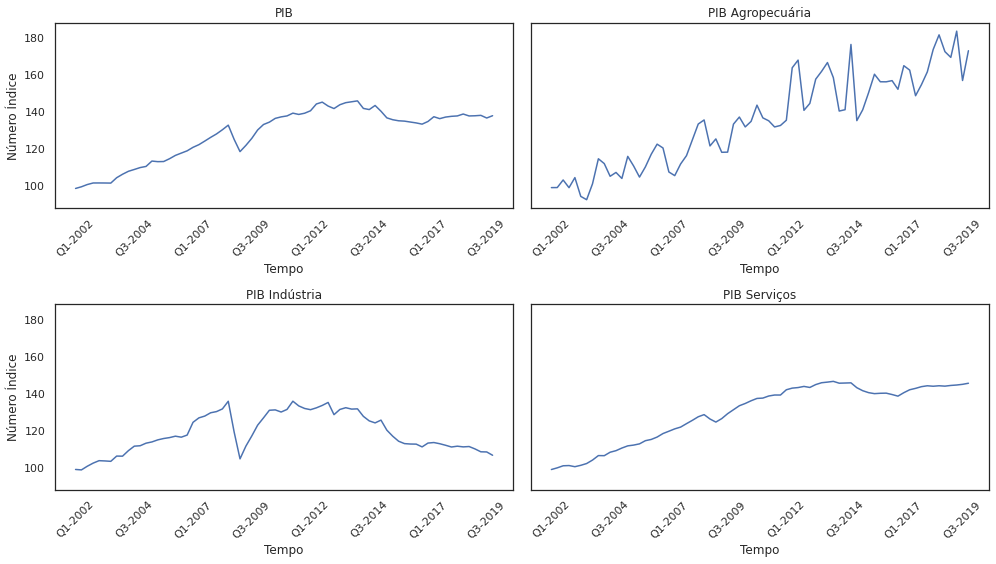

In [ ]:
fig, ax = plt.subplots(ncols = 2, nrows = 2, figsize = (14,8), sharey = True)

# primeiro gráfico
pib_mg['Agropecuária'].plot(ax = ax[0,1])
ax[0,1].set_title('PIB Agropecuária')
ax[0,1].set_ylabel('Número Índice')
ax[0,1].set_xlabel('Tempo')
ax[0,1].tick_params(axis='x', labelrotation=45)

# segundo gráfico
pib_mg['Indústria_total'].plot(ax = ax[1,0])
ax[1,0].set_title('PIB Indústria')
ax[1,0].set_ylabel('Número Índice')
ax[1,0].set_xlabel('Tempo')
ax[1,0].tick_params(axis='x', labelrotation=45)

# terceiro gráfico
pib_mg['Serviços_total'].plot(ax = ax[1,1])
ax[1,1].set_title('PIB Serviços')
ax[1,1].set_ylabel('Número Índice')
ax[1,1].set_xlabel('Tempo')
ax[1,1].tick_params(axis='x', labelrotation=45)

# quarto gráfico
pib_mg['PIB'].plot(ax = ax[0,0])
ax[0,0].set_title('PIB')
ax[0,0].set_ylabel('Número Índice')
ax[0,0].set_xlabel('Tempo')
ax[0,0].tick_params(axis='x', labelrotation=45)

fig.tight_layout()

# salvando a figura em uma extensão .svg
plt.savefig('graf_linha.svg', format="svg")

Todas as opções mostradas não são exclusivas de um gráfico de linha. Esse somente foi utilizado como exemplo, mas toda a estrutura de objetos do tipo `Figure` e do tipo `Axes` funciona para qualquer tipo de gráfico.

A única alteração será sobre uma estrutura particular do gráfico que se está criando.

---

## Histograma

Para criar gráficos do tipo **histograma** será utilizado como exemplo a idade dos alunos que fizeram a prova do enade. 

In [ ]:
# exibindo as cinco primeiras observações dos dados do enade
enade.head()

,co_grupo,cd_catadd,co_uf_curso,co_regiao_curso,nu_idade,genero,ano_fim_2g,tp_inscricao,co_rs_s4n,co_rs_s5n,co_rs_s6n,co_rs_s7n,co_rs_s8n,co_rs_s9n,co_rs_s101,co_rs_s102,co_rs_s103,co_rs_s11n,co_rs_s20n
0,Medicina Veterinária,IES Pública,Mato Grosso,Centro-Oeste,22,0,2008,Concluinte,Ensino Médio,Ensino Superior,Pais/Parentes,"De 1,5 a 3 salários mínimos",Tenho renda,Não trabalho,Não Prouni integral,Não Prouni parcial,Curso gratuito,Auxílio,Sim
1,Medicina Veterinária,IES Pública,Mato Grosso,Centro-Oeste,21,0,2008,Concluinte,Ensino Fundamental 1ª a 4ª,Pós-graduação,Sozinho,De 6 a 10 salários mínimos,Tenho renda/ajuda da família,Não trabalho,Não Prouni integral,Não Prouni parcial,Curso gratuito,Sem auxílio,Sim
2,Medicina Veterinária,IES Pública,Mato Grosso,Centro-Oeste,28,1,2002,Concluinte,Ensino Médio,Pós-graduação,Sozinho,"De 1,5 a 3 salários mínimos",Não tenho renda/ajuda da familía,Não trabalho,Não Prouni integral,Não Prouni parcial,Curso gratuito,Sem auxílio,Sim
3,Medicina Veterinária,IES Pública,Mato Grosso,Centro-Oeste,25,0,2005,Concluinte,Ensino Fundamental 1ª a 4ª,Ensino Superior,Sozinho,"Até 1,5 salário mínimo",Não tenho renda/ajuda da familía,Não trabalho,Não Prouni integral,Não Prouni parcial,Curso gratuito,Sem auxílio,Sim
4,Medicina Veterinária,IES Pública,Mato Grosso,Centro-Oeste,26,1,2004,Concluinte,Ensino Médio,Ensino Médio,Pais/Parentes,"De 3 a 4,5 salários mínimos",Tenho renda/ajuda da família,Não trabalho,Não Prouni integral,Não Prouni parcial,Curso gratuito,Sem auxílio,Sim


A coluna com os registros da idade tem o código `nu_idade`. Então para criar o histograma basta chamar essa série de valores e executando a função `plot` com o parâmetro `kind` igual a `hist`. `Para observar as demais informações, segue os comando que foram vistos anteriormente.

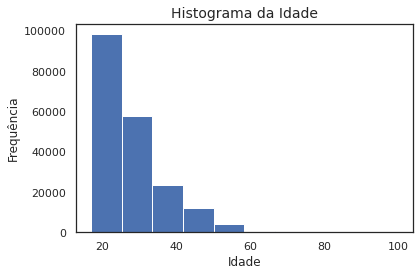

In [ ]:
fig, ax = plt.subplots()

# plotando um histograma
enade['nu_idade'].plot(ax = ax, kind = 'hist')

# informações do gráfico
ax.set_title('Histograma da Idade', fontsize=14)
ax.set_ylabel('Frequência')
ax.set_xlabel('Idade')


fig.tight_layout()

Uma característica particular do histograma é a exibição da densidade de valores ao invés da frequência. Para observar essas informações basta utilizar o parâmetro `density` igual a `True`. Perceba que essa informação é particular de gráficos do tipo histograma, ou seja, esse comando apesar de integrar a função `plot`, ela não funcionaria para o gráfico de linhas por exemplo.

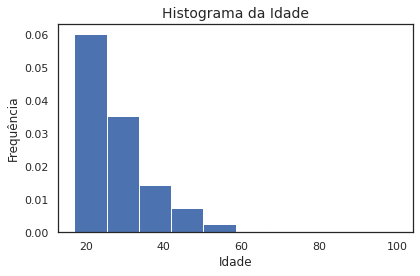

In [ ]:
fig, ax = plt.subplots()

# plotando um histograma com valores de densidade
enade['nu_idade'].plot(ax = ax, kind = 'hist', density = True)

# informações do gráfico
ax.set_title('Histograma da Idade', fontsize=14)
ax.set_ylabel('Frequência')
ax.set_xlabel('Idade')


fig.tight_layout()

Como estamos visualizando um histograma, um outro parâmetro possível de ser alterado ao número de caixas no histograma. Para mudar o número de caixas para 15, por exemplo, basta definir o parâmetri `bins` da função `plot` como sendo igual a 15.

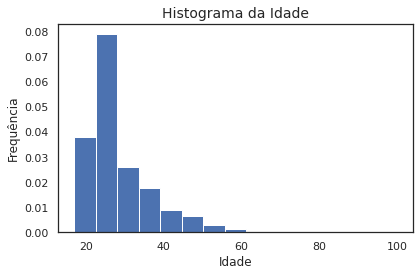

In [ ]:
fig, ax = plt.subplots()

# plotando um histograma com valores de densidade e 15 bins
enade['nu_idade'].plot(ax = ax, kind = 'hist', density = True, bins = 15)

# informações do gráfico
ax.set_title('Histograma da Idade', fontsize=14)
ax.set_ylabel('Frequência')
ax.set_xlabel('Idade')


fig.tight_layout()

É possível também exibir no eixo x as idades de limite para cada `bin`. Esses valores no eixo se chamam **ticks**. Mas para passar os valores primeiro temos que obter os valores. Para isso utilizamos a função do pacote numpy chamada `histogram`. Nessa função passamos a série que estamos criando o histograma e o número de bin, e recebemos como retorno a quantidade de valores que pertencem aos intervalos de caixa e os intervalos.

A primeira informação vamos salvar em um objeto chamado `count`, apesar que não vamos utilizar. A segunda informação vamos salvar em um objeto chamado `bin_edges`. Esse objeto terá então as informações dos intervalores das caixas do histograma e será passado no parâmetro `xticks` da função `plot`.

Como teremos mais informações no eixo x é mais indicado aumentar o tamanho da figura.

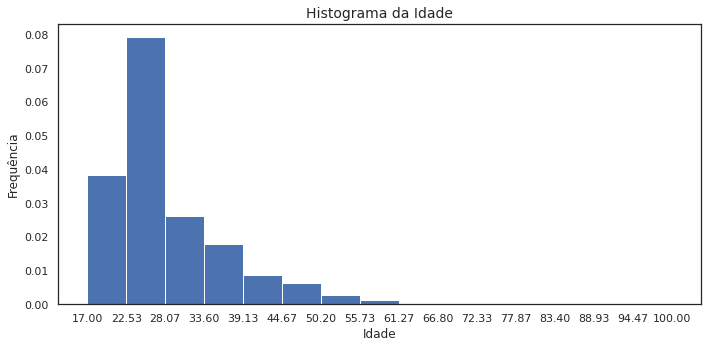

In [ ]:
fig, ax = plt.subplots(figsize = (10,5))

# obtendo informações dos intervalos das caixas do histograma
count, bin_edges = np.histogram(enade['nu_idade'], bins = 15)

# plotando um histograma com valores de densidade e 15 bins e definindo os valores exibidos no eixo x
enade['nu_idade'].plot(ax = ax, kind = 'hist', density = True, bins = 15, xticks = bin_edges)

# informações do gráfico
ax.set_title('Histograma da Idade', fontsize=14)
ax.set_ylabel('Frequência')
ax.set_xlabel('Idade')


fig.tight_layout()

Todos os gráficos feitos até agora utilizaram o pacote `matplotlib` e o estilo dos gráficos do pacote `seaborn`. Porém o pacote `seaborn` também possui suas próprias funções para criação de gráficos. 

Uma dessas funções própria do `seaborn` é a função `distplot`, que plota um histograma com uma curva de densidade de probabilidade.

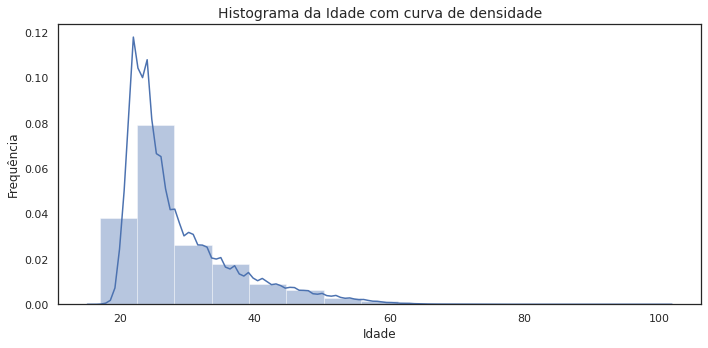

In [ ]:
fig, ax = plt.subplots(figsize = (10,5))

# plotando um histograma com a função distplot do seaborn

sns.distplot(enade['nu_idade'], bins = 15, ax = ax)
ax.set_title('Histograma da Idade com curva de densidade', fontsize=14)
ax.set_ylabel('Frequência')
ax.set_xlabel('Idade')


fig.tight_layout()

No caso o pacote `seaborn` possuiu algumas funções que criam gráficos mais modernos, combinando o gráfico com outras funcionalidades. 

Um outro ponto a ser destacada é que a criação de vários gráficos (objetos `Axes`) na mesma figura (objeto `Figure`) não precisa necessariamente corresponder ao mesmo tipo de gráfico ou função. Por exemplo, é possível plotar um histograma utilizando a função do `matplotlib` e outro histograma com a função do `seaborn`.

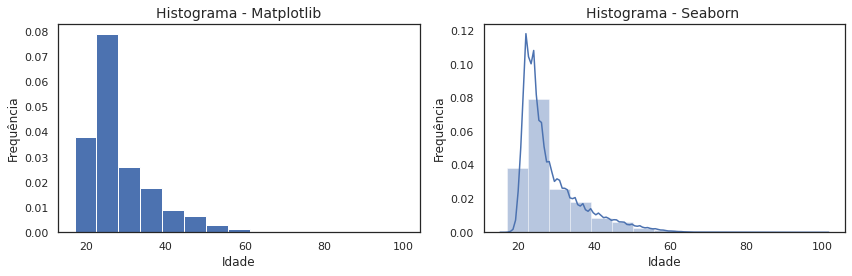

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))

# histograma do matplotlib
enade['nu_idade'].plot(ax = ax[0], kind = 'hist', bins = 15, density = True)
ax[0].set_title('Histograma - Matplotlib', fontsize=14)
ax[0].set_ylabel('Frequência')
ax[0].set_xlabel('Idade')

# histograma do seaborn
sns.distplot(enade['nu_idade'], bins = 15, ax = ax[1])
ax[1].set_title('Histograma - Seaborn ', fontsize=14)
ax[1].set_ylabel('Frequência')
ax[1].set_xlabel('Idade')

fig.tight_layout()

---

## Boxplot

Ainda utilizando a idade dos alunos que realizaram o enade, apresenta-se também o **boxplot**. No caso o boxplot não é um gráfico da função plot, assim como o gráfico de linha ou o histograma. Para criar o boxplot deve-se executar a função `boxplot`.

Chama-se primeiro o dataframe onde está os dados, depois a função, e dentro da função passa-se a série quue terá o boxplot criado.

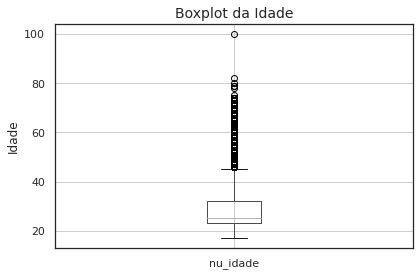

In [ ]:
fig, ax = plt.subplots()

# criando um boxplot da idade
enade.boxplot('nu_idade', ax = ax)

# informações gráficas
ax.set_title('Boxplot da Idade', fontsize=14)
ax.set_ylabel('Idade')

fig.tight_layout()

O gráfico do tipo boxpplot possui duas características possíveis de serem executadas. Uma delas é a orientação do gráfico e o tamanho da caixa em relação ao objeto `Axes` que o engloba. Para alterar a orientação do gráfico de vertical para horizontal basta utilizar o parâmetro `vert` igual a `False` na função do gráfico. Por sua vez, o tamanho da caixa é definida pelo parâmetro `widths`, no caso será usada a medida 0.6.

Perceba também que há a exibição do nome da coluna onde estão os dados, no caso `nu_idade`. Para retirá-la basta definir o valor do *tick* relativo à exibição do texto igual a uma lista vazia.

Por exemplo, ao orientar o gráfico para ser exibido na horizontal o nome da coluna dos dados será exibida no eixo y, então basta utilizar a função `set_yticks([])`. Repare que ao re-orientar o gráfico, o nome da medida `Idade` terá que ser alterada para o eixo x, logo, muda-se a função `set_ylabel` para `set_ xlabel`.

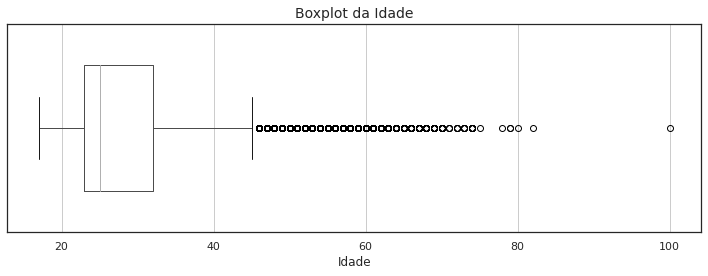

In [ ]:
fig, ax = plt.subplots(figsize = (10,4))

# criando um boxplot da idade
enade.boxplot('nu_idade', ax = ax, vert=False, widths=0.6)

# informações gráficas
ax.set_title('Boxplot da Idade', fontsize=14)
ax.set_xlabel('Idade')

ax.set_yticks([])

fig.tight_layout()

Uma outra funcionalidade muito útil do boxplot é a exibição do boxplot desagregando por uma outra variável do dataframe. Por exemplo, podemos exibir o boxplot da idade mas desagregando pelo tipo de IES que o aluno fez a faculdade. Nesse caso será exibido um boxplot da idade dos alunos para cada tipo de instituição de ensino.

Para isso basta passar no parâmetro `by` a variável que se deseja desagregar o boxplot, no caso o código da coluna com o tipo de instituição de ensino é a `cd_catadd`.

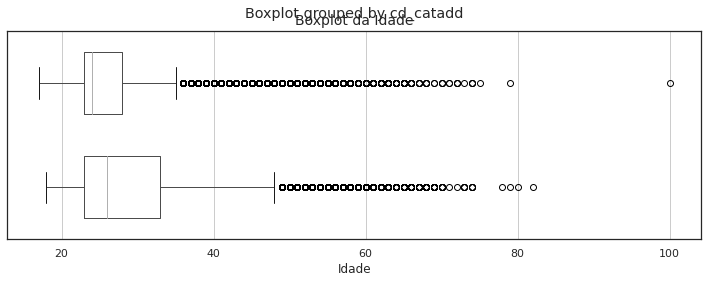

In [ ]:
fig, ax = plt.subplots(figsize = (10,4))

# criando um boxplot da idade
enade.boxplot('nu_idade', ax = ax, vert=False, widths=0.6, by = 'cd_catadd')

# informações gráficas
ax.set_title('Boxplot da Idade', fontsize=14)
ax.set_xlabel('Idade')

ax.set_yticks([])

fig.tight_layout()

Duas coisas são possíveis perceber nesse gráfico. A primeira é que não há legenda no eixo x do gráfico, logo, não é possível saber qual boxplot corresponde a qual tipo de IES. Isso ocorre porquê passamos a funçao `set_yticks([])`, nesse caso as informações relativas a esse eixo não são exibidas. Para obter as informações basta excluir essa linha de código.

Outro detalhe do gráfico é que existem dois titulos que estão se sobrepondo. Um deles é o que definimos na função `set_title`, mas o outro é um título gerado automaticamente pelo *matplotlib*. É interessante observar que esse título gerado automaticamente não faz parte do objeto `Axes`, mas sim do objeto `Figure`. Logo, para excluí-lo temos que utilizar uma função sobre o objeto fig. Essa funçao é a `suptitle` e devemos passar uma aspas vazia.

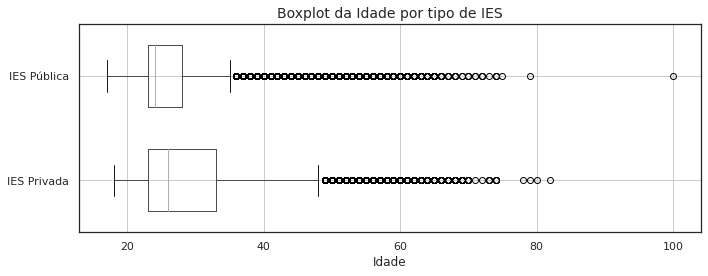

In [ ]:
fig, ax = plt.subplots(figsize = (10,4))

# criando um boxplot da idade
enade.boxplot('nu_idade', ax = ax, vert=False, widths=0.6, by = 'cd_catadd')

# informações gráficas
ax.set_title('Boxplot da Idade por tipo de IES', fontsize=14)
ax.set_xlabel('Idade')

fig.suptitle('')

fig.tight_layout()

---

## Gráfico de barras

Existem duas formas possíveis de plotar um gráfico de barras. A primeira utiliza a função `plot` do pacote `matplotlib` e a segunda utiliza a função `countplot` do pacote `seaborn`. 

### Utilizando a função `plot`

Digamos que queremos plotar um gráfico de barras com a quantidade de alunos para cada tipo de curso. Nesse caso, temos que passar na função `plot` não a série com o curso de cada aluno, mas sim a quantidade relativa de cada curso.

O pandas tem uma função que faz esse agrupamento dos alunos por tipo de curso, que é a função `value_counts`. Sendo assim, temos que passar como série a ser plotada não a serie com os cursos e sim a série resultante do `value_counts`. 

Além disso, o parâmetro da função `plot` que cria um gráfico de barras é o `kind` igual a `bar`.

Perceba que na função que cria o título do gráfico é passado o parâmetro `fontsize` igual a 14, que modifica o tamanho da fonte do título.

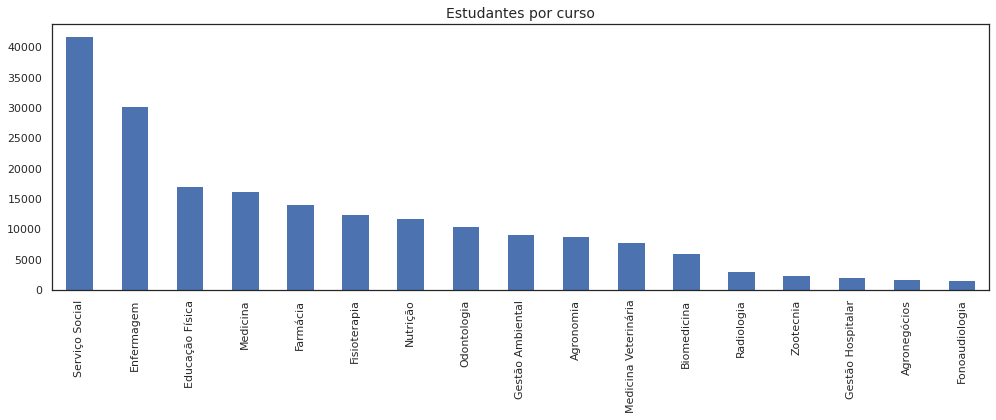

In [ ]:
fig, ax = plt.subplots(figsize = (14, 6))

# gráfico de barras da quantidade de estudantes por curso
enade['co_grupo'].value_counts().plot(ax = ax, kind = 'bar')
ax.set_title('Estudantes por curso', fontsize=14)

fig.tight_layout()

### Countplot

O segundo método para se executar um gráfico de barras é utilizando a função `countplot` do pacote `seaboron`. Uma vantagem de se utilizar a função `countplot` é não precisar passar o resultado da função `value_counts` e sim a série como um tudo. Porém é necessário passar mais parâmetros de ajuste no gráfico.

Por exemplo, a função `tick_params` é usada para rotacionar os valores de *tick` do eixo x, assim como visto no gráfico utilizando a função plot.

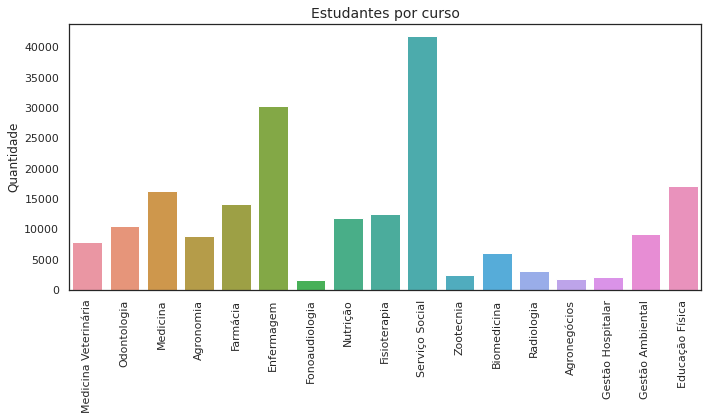

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))


# plotando um gráfico de barras do tipo de curso
sns.countplot(x='co_grupo',  data=enade, ax = ax)

# ajustes gráficos
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel('Quantidade')
ax.set_xlabel('')

ax.set_title('Estudantes por curso', fontsize=14)

fig.tight_layout()

Mas outra vantagem de se utilizar o `countplot` é conseguir desagregar as séries igual foi feito no boxplot. Por exemplo, é possível desagregar a quantidade de alunos por curso mas separando por tipo de IES. Para isso basta passar o parâmetro `hue` igual a série em que se deseja realizar a desagregação.

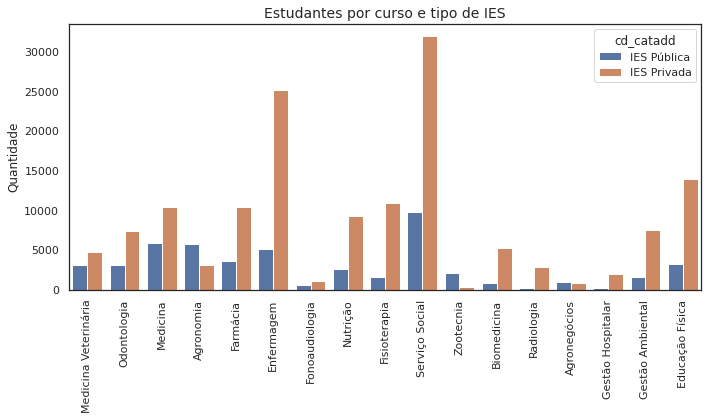

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))


# plotando um gráfico de barras do tipo de curso
sns.countplot(x='co_grupo',  data=enade, ax = ax, hue = 'cd_catadd')

# ajustes gráficos
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel('Quantidade')
ax.set_xlabel('')

ax.set_title('Estudantes por curso e tipo de IES', fontsize=14)

fig.tight_layout()

Outro ajuste possível de ser feito é alterar o título da legenda, que no caso está mostrando o código da variável em que se fez a desagregação. Para excluir esse título basta utilizar a função `legend` com o parâmetro `title` igual a uma aspas simples vazia.

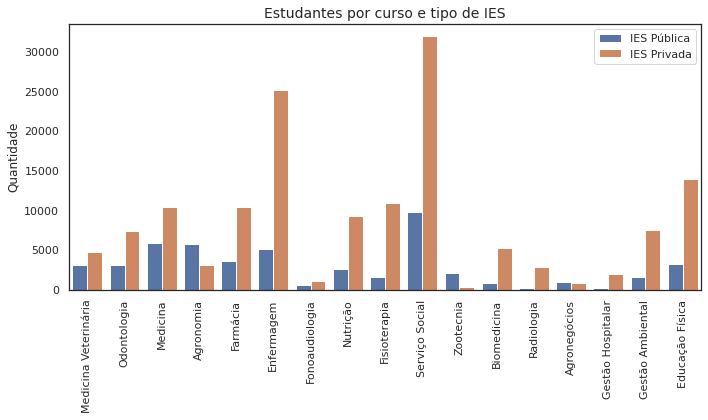

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))


# plotando um gráfico de barras do tipo de curso
sns.countplot(x='co_grupo',  data=enade, ax = ax, hue = 'cd_catadd')

# ajustes gráficos
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel('Quantidade')
ax.set_xlabel('')

ax.set_title('Estudantes por curso e tipo de IES', fontsize=14)
ax.legend(title = '')

fig.tight_layout()

---

## Gráfico de dispersão

Outro estilo de gráfico que possui duas formas de exibição, uma utilizando o `matplotlib` e outra utilizando o `seaborn` é o gráfico de dispersão. Como exemplo utilizaremos os dados do índice mineiro de responsabilidade social para a educação da região metropolitana de MG.

In [ ]:
# observando as cinco primeiras entradas do dataframe do irms
imrs.head()

,Município,Índice de Qualidade da Educação para a 4ª série /5º ano do EF (matemática),Índice de Qualidade da Educação para a 8ª série/9º ano do EF (matemática),Índice de Qualidade da Educação para a 3ª série do EM (matemática),Nova média,Índice de Qualidade da Educação para a 4ª série /5º ano do EF (Língua Portuguesa),Índice de Qualidade da Educação para a 8ª série/9º ano do EF (Língua Portuguesa),Índice de Qualidade da Educação para a 3ª série do EM (Língua Portuguesa),Índice de Qualidade da Educação para a 4ª série /5º ano do EF,Índice de Qualidade da Educação para a 8ª série/9º ano do EF,Índice de Qualidade da Educação para a 3ª série do EM,Índice de Qualidade Geral da Educação,Taxa de alunos da 8ª série/9º ano do fundamental acima do nível BÁSICO - Matemática,Taxa de alunos da 8ª série/9º ano do fundamental acima do nível BÁSICO - Português,Taxa de alunos da 3ª série do médio acima do nível BÁSICO - Matemática,Taxa de alunos da 3ª Série do médio acima do nível BÁSICO - Português,Número de alunos da 8ª série/9º ano do fundamental que fizeram a prova de Matemática do PROEB,Número de alunos da 8ª série/9º ano do fundamental que fizeram a prova de Português do PROEB,Número de alunos da 3ª série do médio que fizeram a prova de Matemática do PROEB,Número de alunos da 3ª série do médio que fizeram a prova de Português do PROEB,Percentual de alunos da 8ª série/9º ano do fundamental que fizeram a prova de Matemática do PROEB,Percentual de alunos da 8ª série/9º ano do fundamental que fizeram a prova de Português do PROEB,Percentual de alunos da 3ª série do médio que fizeram a prova de Matemática do PROEB,Percentual de alunos da 3ª série do médio que fizeram a prova de Português do PROEB,Taxa de alunos em escolas com laboratório de informática - fundamental,Taxa de alunos em escolas com Internet - fundamental,Taxa de alunos em escolas com laboratório de informática - médio,Taxa de alunos em escolas com Internet - médio,Percentual de Funções Docentes com curso superior_EI,Percentual de Funções Docentes com curso superior_EF,Percentual de Funções Docentes com curso superior_EFAI,Percentual de Funções Docentes com curso superior_EFAF,Percentual de Funções Docentes com curso superior_EM,Percentual de docentes por grupo do indicador de adequação da formação do docente (Grupo 1)_EI,Percentual de docentes por grupo do indicador de adequação da formação do docente (Grupo 2)_EI,Percentual de docentes por grupo do indicador de adequação da formação do docente (Grupo 3)_EI,Percentual de docentes por grupo do indicador de adequação da formação do docente (Grupo 4)_EI,Percentual de docentes por grupo do indicador de adequação da formação do docente (Grupo 5)_EI,Percentual de docentes por grupo do indicador de adequação da formação do docente (Grupo 1)_EF,Percentual de docentes por grupo do indicador de adequação da formação do docente (Grupo 2)_EF,Percentual de docentes por grupo do indicador de adequação da formação do docente (Grupo 3)_EF,Percentual de docentes por grupo do indicador de adequação da formação do docente (Grupo 4)_EF,Percentual de docentes por grupo do indicador de adequação da formação do docente (Grupo 5)_EF,Percentual de docentes por grupo do indicador de adequação da formação do docente (Grupo 1)_EFAI,Percentual de docentes por grupo do indicador de adequação da formação do docente (Grupo 2)_EFAI,Percentual de docentes por grupo do indicador de adequação da formação do docente (Grupo 3)_EFAI,Percentual de docentes por grupo do indicador de adequação da formação do docente (Grupo 4)_EFAI,Percentual de docentes por grupo do indicador de adequação da formação do docente (Grupo 5)_EFAI,Percentual de docentes por grupo do indicador de adequação da formação do docente (Grupo 1)_EFAF,Percentual de docentes por grupo do indicador de adequação da formação do docente (Grupo 2)_EFAF,Percentual de docentes por grupo do indicador de adequação da formação do docente (Grupo 3)_EFAF,Percentual de docentes por grupo do indicador de adequação 

### Padrão

Para plotar o gráfico de dispersão utilizando a função `plot` basta passar no parâmetro `kind` o tipo `scatter`. Além disso é necessário passar qual série vai estar no eixo x e qual estará no eixo y. No caso iremos passar no eixo x a série do índice de qualidade da educação para o 3º ano do ensino médio para matemátca e no eixo y a série do índice de qualidade geral.

O resto dos ajustes são os mesmos que já executamos nos outros gráficos.

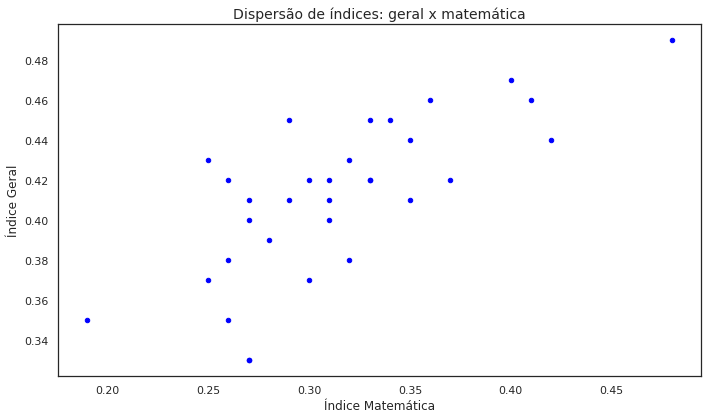

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))

# plotando o scatterplot
imrs.plot(x = 'Índice de Qualidade da Educação para a 3ª série do EM (matemática)', 
                  y = 'Índice de Qualidade Geral da Educação', ax=ax, c='blue', kind = 'scatter')

ax.set_ylabel('Índice Geral')
ax.set_xlabel('Índice Matemática')
ax.set_title('Dispersão de índices: geral x matemática', fontsize=14)

plt.tight_layout()

### Dispersão e regressão

O pacote `seaborn` também tem uma função que exibe um gráfico de dispersão, que é a função `regplot`. No caso além do gráfico de dispersão é criada uma reta de regressão para os dados e um intervalo de confiança.


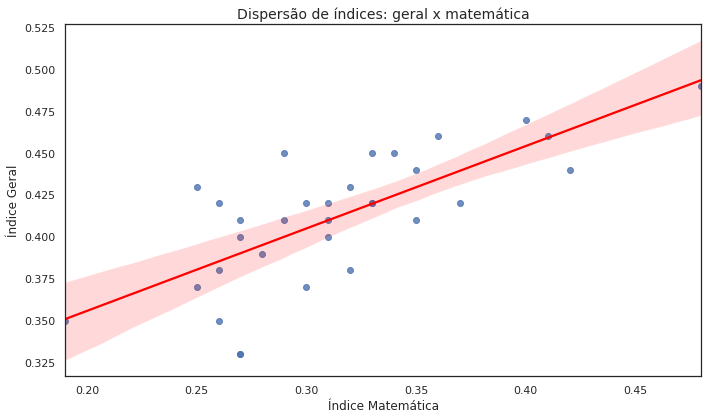

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))

# plotando o scatterplot com a reta de regressão
sns.regplot(x = 'Índice de Qualidade da Educação para a 3ª série do EM (matemática)', y = 'Índice de Qualidade Geral da Educação', 
            line_kws={"color": "red"}, data=imrs, ax=ax)

ax.set_ylabel('Índice Geral')
ax.set_xlabel('Índice Matemática')
ax.set_title('Dispersão de índices: geral x matemática', fontsize=14)

plt.tight_layout()

---

## Gráfico de pizza

Um outro gráfico muito utilizado é o gráfico de pizza/torta, que exibe a proporção de valores em um dataframe. Como exemplo iremos plotar um gráfico de pizza para as regiões dos alunos que fizeram o enade.

O primeiro passo para criar o gráfico de pizza é criar um dicionário com a quantidade de alunos para cada região. No caso basta utilizar a função `value_counts` e salvar o resultado em um dicionário.

In [ ]:
# extrair as ocorrências para um dicionário
regioes = dict(enade['co_regiao_curso'].value_counts())

# observando o objeto
regioes

{'Centro-Oeste': 22045,
 'Nordeste': 39292,
 'Norte': 17940,
 'Sudeste': 77704,
 'Sul': 39874}

O próximo passo é separar as informações em *labels* e *sizes* que são, respectivamente, as regiões (*keys*) e as quantidades (*values*).

In [ ]:
# preparar dados para o gráfico de pizza
labels = regioes.keys()
sizes = regioes.values()

Agora basta criar o gráfico a partir da função `pie`, passando como parâmetros o objeto *sizes* e o objeto *labels*.

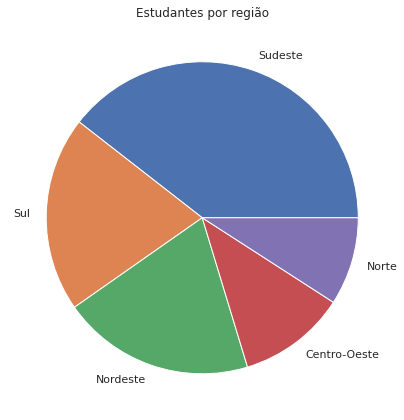

In [ ]:
# plotar o gráfico de pizza
fig, ax = plt.subplots(figsize=(6,6))

ax.pie(sizes, labels=labels)
ax.set_title('Estudantes por região')

plt.tight_layout()

Um parâmetro da função `pie` que é bastante útil é o parâmetro `autopct`, que plota as porcentagens de cada região. No caso, o resultado *%1.2f%%* significa que os valores exibidos terão duas casas decimais.

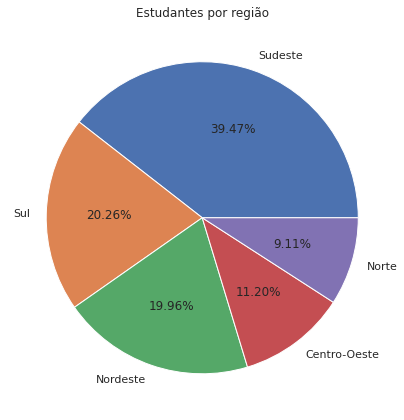

In [ ]:
# plotar o gráfico de pizza
fig, ax = plt.subplots(figsize=(6,6))

ax.pie(sizes, labels=labels, autopct='%1.2f%%')
ax.set_title('Estudantes por região')

plt.tight_layout()

Uma outra funcionalidade do gráfico de pizza é criar um gráfico "*explosivo*", onde as partes da "pizza" saem do gráfico para criarum efeito mais focado nos valores mais representativos. Para isso, basta criar uma tupla com os valores das distancias que cada região irá ter a partir do centro do gráfico. 

No caso, a região com mais valor irá se afastar 0.2 u.m. do centro do gráfico, as duas regiões seguintes mais representativas irão se afastar 0.1 u.m., e as duas últimas séries não irão se afastar do centro do gráfico.

In [ ]:
# informações para a distancia
distancia = (0.2, 0.1, 0.1, 0, 0)

Agora basta passar as distâncias no parâmetro `explode` da função `pie`. Um outro parâmetro que cria um efeito nos "pedaços da pizza" é o parâmetro `shadow` igual a `True`.

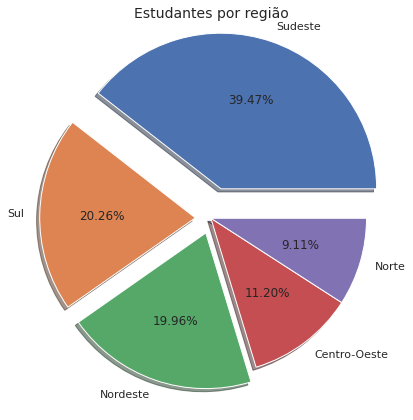

In [ ]:
# plotar o gráfico de pizza
fig, ax = plt.subplots(figsize=(6,6))

ax.pie(sizes, labels=labels, explode=distancia, autopct='%1.2f%%', shadow = True)
ax.set_title('Estudantes por região', fontsize = 14)

plt.tight_layout()

---

## Heatmap

Para finalizar os tipos de gráficos exibidos neste módulo está o `heatmap`. Ele é um gráfico de calor que relaciona as cores do gráfico e uma medida estatística, por exemplo, a correlação.

Como exemplo utilizaremos mais uma vez os dados do índice mineiro de responsabilidade social. No caso, iremos primeiro criar uma lista com as variáveis que serão analisadas no *heatmap*. Serão utilizadas os índices da qualidade da educação para 4ª série/5º ano, 8ª série/9º ano e 3ª série do ensino médio para matemática e português. 



In [ ]:
# criando lista de variáveis alvo
variaveis = ['Índice de Qualidade da Educação para a 4ª série /5º ano do EF (matemática)',
             'Índice de Qualidade da Educação para a 8ª série/9º ano do EF (matemática)',
             'Índice de Qualidade da Educação para a 3ª série do EM (matemática)',
             'Índice de Qualidade da Educação para a 4ª série /5º ano do EF (Língua Portuguesa)',
             'Índice de Qualidade da Educação para a 8ª série/9º ano do EF (Língua Portuguesa)',
             'Índice de Qualidade da Educação para a 3ª série do EM (Língua Portuguesa)',
             'Índice de Qualidade Geral da Educação']

Agora basta passar na função `heatmap` do `seaborn` as correlações (função `corr`) entre as séries alvo. A função `round` é utilizada para padronizar as casas decimais das correlações.



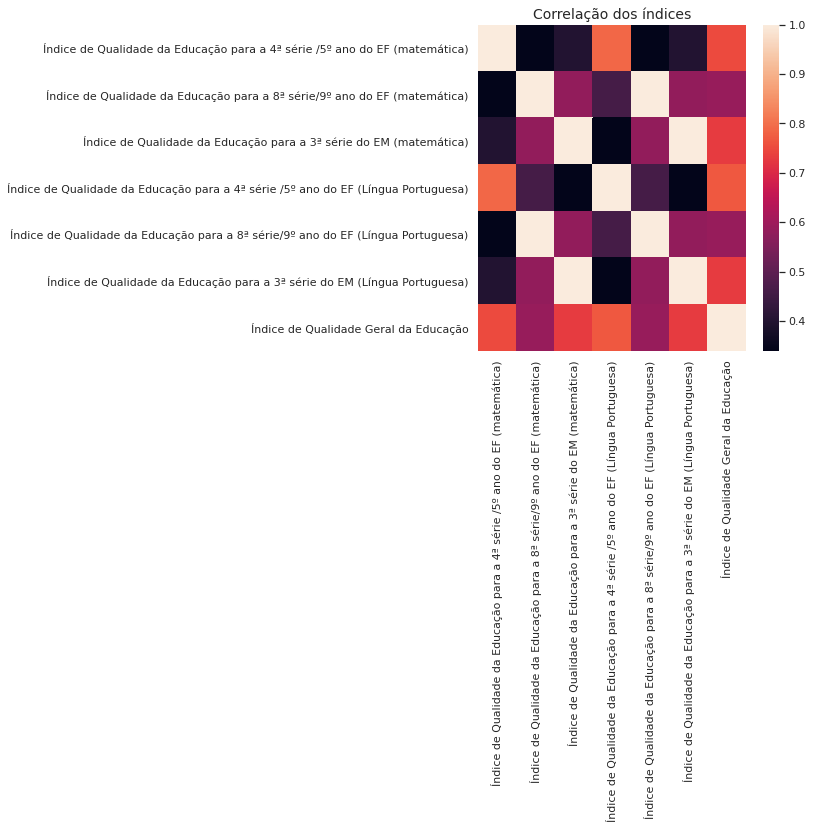

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))

# plotando o heatmap das correlações entre os índices
sns.heatmap(round(imrs[variaveis].corr(),2))
ax.set_title('Correlação dos índices', fontsize = 14)

plt.show()

No caso, o heatmap não fica muito bem definido, pois ele define o valores mínimo e máximo para criar a tabela de "calor" das cores a partir dos valores que estão apresentados nas séries. Mas é interessante definir os valores -1 e 1 como valores mínimos e máximos para a paleta de cores. Para isso basta utilizar os parâmetros  `vmin` e `vmax`.

Outro parâmetro que melhora a visualização do *heatmap*  é o parâmetro `cmap`, que possui vários padrões de cores já definidos. No caso, será utilizado o padrão `Blues`. Por fim, o parâmetro `Annot` igual a `True` faz com que os valores das correlações sejam exibidas no *heatmap*.

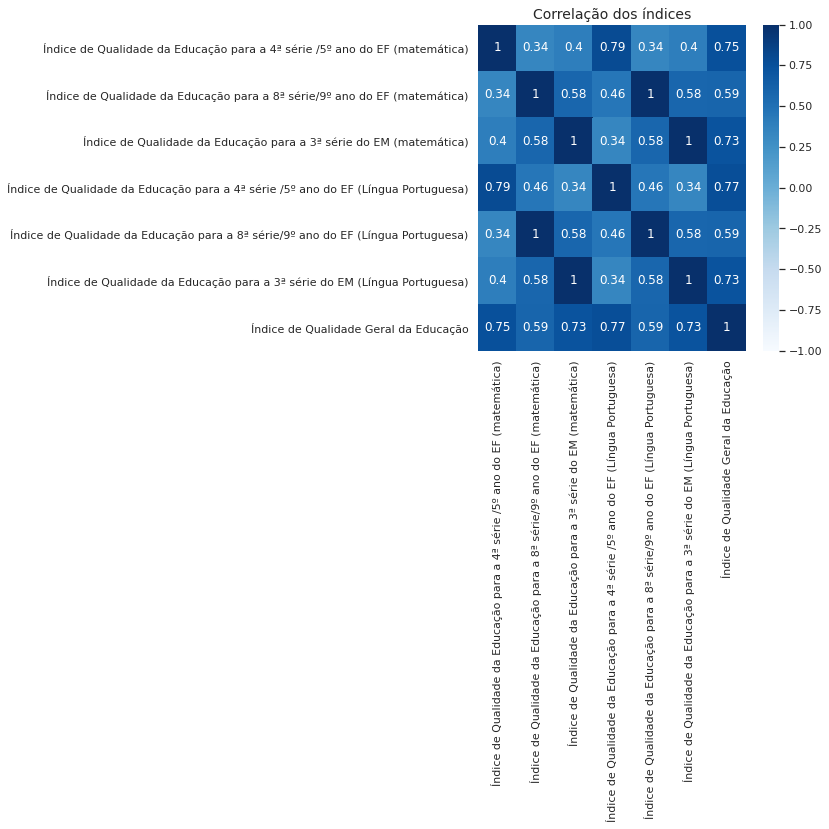

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
            				
# plotando o heatmap das correlações entre os índices
sns.heatmap(data = round(imrs[variaveis].corr(),2), vmax = 1.0, vmin = -1.0,  cmap="Blues", annot = True)
ax.set_title('Correlação dos índices', fontsize = 14)

plt.show()

---

## Outros pacotes

Esse módulo teve como objetivo mostrar somente as principais técnicas que envolvem a criação de gráficos no Python. O motivo disso é porquê existem hoje diversos pacotes que criam visualizações de dados diferntes do padrão. Segue abaixo os links dos pacotes para consulta.

* Gráfico de Waffle - [Link](https://github.com/gyli/PyWaffle)
* Wordcloud - [Link](https://amueller.github.io/word_cloud/)
* Plotly - [Link](https://plotly.com/python/)

---